In [ ]:
# montamos GDrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%tensorflow_version 1.x

In [ ]:
import tensorflow as tf
print(tf.__version__)

1.15.2


In [ ]:
# Dataset: https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&refine.country=Spain&q=Madrid
# Link directo: https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B

In [ ]:
# Recurso para aprender a cargar datos en Colab: 
# https://colab.research.google.com/notebooks/io.ipynb#scrollTo=RWSJpsyKqHjH

In [ ]:
# nos descargamos el dataset de OpenDataSoft
!wget -O "airbnb-listings.csv" "https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B"

--2020-06-26 21:44:01--  https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B
Resolving public.opendatasoft.com (public.opendatasoft.com)... 34.248.20.69, 34.249.199.226
Connecting to public.opendatasoft.com (public.opendatasoft.com)|34.248.20.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘airbnb-listings.csv’

airbnb-listings.csv     [       <=>          ]  54.19M  2.99MB/s    in 18s     

2020-06-26 21:44:21 (2.99 MB/s) - ‘airbnb-listings.csv’ saved [56826824]



In [ ]:
!ls -lah

total 2.0G
drwxr-xr-x 1 root root 4.0K Jun 26 21:21 .
drwxr-xr-x 1 root root 4.0K Jun 26 20:37 ..
-rw-r--r-- 1 root root  55M Jun 26 21:44 airbnb-listings.csv
drwxr-xr-x 1 root root 4.0K Jun 25 17:02 .config
drwx------ 4 root root 4.0K Jun 26 21:03 drive
-rw-r--r-- 1 root root 381M Jun 26 21:21 images_test.npy
-rw-r--r-- 1 root root 1.2G Jun 26 21:37 images_train.npy
-rw-r--r-- 1 root root 303M Jun 26 21:18 images_val.npy
drwxr-xr-x 1 root root 4.0K Jun 17 16:18 sample_data
-rw-r--r-- 1 root root 1.1M Jun 26 21:29 test.csv
-rw-r--r-- 1 root root 3.5M Jun 26 21:29 train.csv
-rw-r--r-- 1 root root 880K Jun 26 21:29 val.csv
-rw-r--r-- 1 root root  21K Jun 26 21:21 was_loaded_test.npy
-rw-r--r-- 1 root root  67K Jun 26 21:37 was_loaded_train.npy
-rw-r--r-- 1 root root  17K Jun 26 21:18 was_loaded_val.npy


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Leemos el dataset con pandas y mostramos los 5 primeros registros

data = pd.read_csv('airbnb-listings.csv', sep = ';')


In [ ]:
# Hacemos un drop de todas las columnas que OBVIAMENTE no aportan información relevante
not_useful_columns = [
    'ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Medium Url', 
    'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 
    'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Weekly Price', 
    'Monthly Price', 'Calendar Updated', 'Calendar last Scraped', 'First Review', 
    'Last Review', 'Reviews per Month', 'Geolocation', 'Calculated host listings count',
    'Host Listings Count', 'Host Total Listings Count'
]

data.drop(not_useful_columns, axis=1, inplace=True)

In [ ]:
# Hacemos un drop de todas las columnas que aportando información quedan fuera del scope
somehow_useful_columns_but_droppable_anyway = ['Name', 'Summary', 'Space', 'Description',
       'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Host Location', 'Host About','Amenities','Features','Experiences Offered','Host Verifications'
]

data.drop(somehow_useful_columns_but_droppable_anyway, axis=1, inplace=True)

In [ ]:
#Separamos el dataset en train y test
from sklearn.model_selection import train_test_split
#full_df = pd.read_csv('./airbnb-listings-extract.csv', sep=';', decimal='.')
train, test = train_test_split(data, test_size=0.2, shuffle=True, random_state=0)
print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')
# Guardamos
train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)
# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 


Dimensiones del dataset de training: (11200, 49)
Dimensiones del dataset de test: (2801, 49)


In [ ]:
dfTrain = pd.read_csv('./train.csv', sep=';', decimal='.')

In [ ]:
#Separamos el dataset de train en train y validacion
train, val = train_test_split(dfTrain, test_size=0.2, shuffle=True, random_state=0)
print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de val: {val.shape}')
# Guardamos
train.to_csv('./train.csv', sep=';', decimal='.', index=False)
val.to_csv('./val.csv', sep=';', decimal='.', index=False)
# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 
dfTrain = pd.read_csv('./train.csv', sep=';', decimal='.')

Dimensiones del dataset de training: (8960, 49)
Dimensiones del dataset de val: (2240, 49)


In [ ]:
#Nos vamos a ceñir solo a Madrid capital
dfTrain['City'].unique()
dfTrain['City'].value_counts()

Madrid              8449
Barcelona            192
马德里                   33
Alcúdia               30
Palma                 26
                    ... 
Pina                   1
Muro (Mallorca)        1
Port de Pollença       1
Chiva                  1
San Lázaro             1
Name: City, Length: 109, dtype: int64

In [ ]:
df_Madrid = dfTrain[dfTrain['City']!='Madrid']

In [ ]:
dfTrain.drop(df_Madrid.index, inplace = True)

In [ ]:
#Podemos borrar estas variable de situación y nos vamos a quedar co la latitud, longitud y barrio
columnas_loc = [
    'City', 'Country','Country Code', 'State', 'Market', 'Smart Location', 'Street', 'Zipcode'
]
dfTrain.drop(columnas_loc, axis=1, inplace=True)

In [ ]:
columnas_nulos = [
    'Host Acceptance Rate', 'Square Feet','Has Availability','License', 'Jurisdiction Names'
]
dfTrain.drop(columnas_nulos, axis=1, inplace=True)

Vamos que variables podedmos eliminar por estar fuertemente correladas

In [ ]:
columnas_cr = [
    'Accommodates','Availability 60','Availability 90','Review Scores Rating'
]
dfTrain.drop(columnas_cr, axis=1, inplace=True)

Observando los tres campos, parece que me voy a quedar con Neighbourhood Cleansed porque el Neighbourhood Group Cleansed parece que es el Distrito y Neighbourhood tiene valores nulos se parece mucho a Neighbourhood Cleansed

In [ ]:
dfTrain.drop(['Neighbourhood Group Cleansed','Neighbourhood'], axis=1, inplace=True)

In [ ]:
dfTrain["Host Response Time"].fillna(dfTrain["Host Response Time"].mode()[0], inplace=True)

Elimino la variable temporal 'Host Since' para nuestro estudio

In [ ]:
dfTrain.drop(['Host Since'], axis=1, inplace=True)

Eliminamos de nuestro dataset as filas con el Price nulo

In [ ]:
dfTrain = dfTrain.dropna(axis=0, subset=['Price'])

In [ ]:
df_nn = dfTrain[list(dfTrain.select_dtypes(include=['object']).columns)]
df_nn.apply(lambda x: len(x.unique())) # valores diferentes

Thumbnail Url             6846
Host Response Time           4
Neighbourhood Cleansed     125
Property Type               19
Room Type                    3
Bed Type                     5
Cancellation Policy          5
dtype: int64

In [ ]:
df_num = dfTrain[list(dfTrain.select_dtypes(include=['float64']).columns)]

In [ ]:
# aquí creamos nuestra estructura de datos, que va a consistir en la url de la
# imagen y un índice para saber donde insertarla en nuestro array
images_paths_train = [[i, img_url] for i, img_url in enumerate(dfTrain['Thumbnail Url'])]

In [ ]:
dfTrain.drop(['Thumbnail Url'], axis=1, inplace=True)

In [ ]:
import imageio as io
import cv2

# esta es la función que se descargará la imagen y devolverá la imagen y el 
# índice indicando la posición donde se incrustará la imagen en nuestro array
def get_image(data_url, target_size=(224, 224)):
    idx, url = data_url
    try:
        img = io.imread(url)
        # hay alguna imagen en blanco y negro y daría error al incluirla en 
        # nuestro array de imagenes que tiene 3 canales, así que convertimos
        # todas las imágenes que tengan menos de 3 dimensiones a color
        if img.ndim < 3:
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        img = cv2.resize(img, dsize=target_size)
        return img, idx
    except IOError as err:
        return (None, idx)

In [ ]:
import numpy as np

# en este array iremos incrustando las imágenes conforme las vayamos obteniendo
loaded_images_train = np.zeros((len(images_paths_train), 224, 224, 3), dtype=np.uint8)

# y en este array llevaremos un control de cuales se han cargado correctamente
# y cuales no
was_loaded_train = np.zeros(len(images_paths_train))

In [ ]:
import concurrent
from tqdm import tqdm

# creamos un pool de procesos que se irán descargando las imágenes
# por defecto, se crearán tantos como CPUs tenga vuestra máquina
with concurrent.futures.ProcessPoolExecutor() as executor:
    # procesamos la lista de urls de imágenes paralelizandola con el pool de procesos
    for (img, idx) in tqdm(executor.map(get_image, images_paths_train), total=len(images_paths_train)):
        # metemos la imagen en nuestro array
        if img is not None:
            loaded_images_train[idx] = img
            was_loaded_train[idx] = 1
        else:
            was_loaded_train[idx] = 0

print('Terminado!')
print(f'Total de imágenes recuperadas correctamente: {sum(was_loaded_train)}/{len(images_paths_train)}')

100%|██████████| 8442/8442 [09:28<00:00, 14.86it/s]


Terminado!
Total de imágenes recuperadas correctamente: 6834.0/8442


In [ ]:
# guardamos las imágenes (y yo os recomiendo que os lo guardéis en GDrive para evitar tener que repetir esto)
np.save('images_train.npy', loaded_images_train)
np.save('was_loaded_train.npy', was_loaded_train)

In [ ]:
# almacenamos las imagenes en nuestro drive
!cp images_train.npy /content/drive/My\ Drive/images_train.npy
!cp was_loaded_train.npy /content/drive/My\ Drive/was_loaded_train.npy

In [ ]:
!ls -lah images_train.npy was_loaded_train.npy

-rw-r--r-- 1 root root 1.2G Jun 26 21:54 images_train.npy
-rw-r--r-- 1 root root  67K Jun 26 21:54 was_loaded_train.npy


In [ ]:
df_nn.drop(['Thumbnail Url'], axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# En train creamos un dict para usarlo después en validacion y test
# ESTO ES EN TRAIN.CSV!
mean_map = {}
for c in df_nn:
    mean = dfTrain.groupby(c)['Price'].mean()
    dfTrain[c] = dfTrain[c].map(mean)    
    mean_map[c] = mean

In [ ]:
# Esto solo sirve para mover price a la primera posición
cols = dfTrain.columns.tolist()
cols.insert(0, cols.pop(cols.index('Price')))
dfTrain = dfTrain[cols]

dfTrain.fillna(dfTrain.mean(), inplace=True)
dfTrain.isnull().any()

Price                          False
Host Response Time             False
Host Response Rate             False
Neighbourhood Cleansed         False
Latitude                       False
Longitude                      False
Property Type                  False
Room Type                      False
Bathrooms                      False
Bedrooms                       False
Beds                           False
Bed Type                       False
Security Deposit               False
Cleaning Fee                   False
Guests Included                False
Extra People                   False
Minimum Nights                 False
Maximum Nights                 False
Availability 30                False
Availability 365               False
Number of Reviews              False
Review Scores Accuracy         False
Review Scores Cleanliness      False
Review Scores Checkin          False
Review Scores Communication    False
Review Scores Location         False
Review Scores Value            False
C

### Preparamos las etiquetas

In [ ]:
# nos quedamos con los datos para los que hemos podido encontrar imágenes
dfTrain_with_imgs = dfTrain[was_loaded_train == 1]

In [ ]:
# seleccionamos la que será nuestra etiqueta
y_train_reg = dfTrain_with_imgs['Price']

In [ ]:
y_train_class = []
for x in y_train_reg:
    # barato
    if x <= 50:
        y_train_class.append(0)
    elif x <=150:
        y_train_class.append(1)
    else:
        y_train_class.append(2)

In [ ]:
from sklearn import preprocessing

dataTrain = dfTrain_with_imgs.values

#y_train = data[:,0:1]     # nos quedamos con la 1ª columna, price
X_train = dataTrain[:,1:]      # nos quedamos con el resto

feature_names = dfTrain_with_imgs.columns[1:]

# Escalamos (con los datos de train)
#scaler = preprocessing.StandardScaler().fit(X_train)
#dfTrain_norm = scaler.transform(X_train)
#XtrainScaled = scaler.transform(X_train)


In [ ]:

scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
dfTrain_norm = scaler.transform(X_train)


Ahora voy hacer las mismas transformaciones para el dataset de validacion

In [ ]:
dfVal = pd.read_csv('./val.csv', sep=';', decimal='.')
dfVal_Madrid = dfVal[dfVal['City']!='Madrid']
dfVal.drop(dfVal_Madrid.index, inplace = True)
dfVal.drop(columnas_loc, axis=1, inplace=True)
dfVal.drop(columnas_nulos, axis=1, inplace=True)
dfVal.drop(columnas_cr, axis=1, inplace=True)
dfVal.drop(['Neighbourhood Group Cleansed','Neighbourhood'], axis=1, inplace=True)
dfVal["Host Response Time"].fillna(dfVal["Host Response Time"].mode()[0], inplace=True)
dfVal.drop(['Host Since'], axis=1, inplace=True)
images_paths_val = [[i, img_url] for i, img_url in enumerate(dfVal['Thumbnail Url'])]
dfVal.drop(['Thumbnail Url'], axis=1, inplace=True)
# en este array iremos incrustando las imágenes conforme las vayamos obteniendo
loaded_images_val = np.zeros((len(images_paths_val), 224, 224, 3), dtype=np.uint8)

# y en este array llevaremos un control de cuales se han cargado correctamente
# y cuales no
was_loaded_val = np.zeros(len(images_paths_val))

In [ ]:
# creamos un pool de procesos que se irán descargando las imágenes
# por defecto, se crearán tantos como CPUs tenga vuestra máquina
with concurrent.futures.ProcessPoolExecutor() as executor:
    # procesamos la lista de urls de imágenes paralelizandola con el pool de procesos
    for (img, idx) in tqdm(executor.map(get_image, images_paths_val), total=len(images_paths_val)):
        # metemos la imagen en nuestro array
        if img is not None:
            loaded_images_val[idx] = img
            was_loaded_val[idx] = 1
        else:
            was_loaded_val[idx] = 0

print('Terminado!')
print(f'Total de imágenes recuperadas correctamente: {sum(was_loaded_val)}/{len(images_paths_val)}')

100%|██████████| 2107/2107 [02:05<00:00, 16.79it/s]


Terminado!
Total de imágenes recuperadas correctamente: 1702.0/2107


In [ ]:
# guardamos las imágenes (y yo os recomiendo que os lo guardéis en GDrive para evitar tener que repetir esto)
np.save('images_val.npy', loaded_images_val)
np.save('was_loaded_val.npy', was_loaded_val)

In [ ]:
# almacenamos las imagenes en nuestro drive
!cp images_val.npy /content/drive/My\ Drive/images_val.npy
!cp was_loaded_val.npy /content/drive/My\ Drive/was_loaded_val.npy

In [ ]:

# Categorizamos con los datos de train!
for c in df_nn:
    dfVal[c] = dfVal[c].map(mean_map[c])

In [ ]:
cols = dfVal.columns.tolist()
cols.insert(0, cols.pop(cols.index('Price')))
dfVal = dfVal[cols]

dfVal.fillna(dfTrain.mean(), inplace=True)
dfVal.isnull().any()

Price                          False
Host Response Time             False
Host Response Rate             False
Neighbourhood Cleansed         False
Latitude                       False
Longitude                      False
Property Type                  False
Room Type                      False
Bathrooms                      False
Bedrooms                       False
Beds                           False
Bed Type                       False
Security Deposit               False
Cleaning Fee                   False
Guests Included                False
Extra People                   False
Minimum Nights                 False
Maximum Nights                 False
Availability 30                False
Availability 365               False
Number of Reviews              False
Review Scores Accuracy         False
Review Scores Cleanliness      False
Review Scores Checkin          False
Review Scores Communication    False
Review Scores Location         False
Review Scores Value            False
C

In [ ]:
# nos quedamos con los datos para los que hemos podido encontrar imágenes
dfVal_with_imgs = dfVal[was_loaded_val == 1]

In [ ]:
# seleccionamos la que será nuestra etiqueta
y_val_reg = dfVal_with_imgs['Price']

In [ ]:
y_val_class = []
for x in y_val_reg:
    # barato
    if x <= 50:
        y_val_class.append(0)
    elif x <=150:
        y_val_class.append(1)
    else:
        y_val_class.append(2)

In [ ]:
data_val = dfVal_with_imgs.values

y_val = data_val[:,0:1]     # nos quedamos con la 1ª columna, price
X_val = data_val[:,1:]      # nos quedamos con el resto

feature_names_val = dfVal_with_imgs.columns[1:]



In [ ]:
# recordad que esta normalización/escalado la realizo con el scaler anterior, basado en los datos de training!
dfVal_norm = scaler.transform(X_val) 

In [ ]:
# convertimos las etiquetas a onehot
from keras.utils import to_categorical
y_class_train_onehot = to_categorical(y_train_class)
y_class_val_onehot = to_categorical(y_val_class)


In [ ]:
dfTest = pd.read_csv('./test.csv', sep=';', decimal='.')
dfTest_Madrid = dfTest[dfTest['City']!='Madrid']
dfTest.drop(dfTest_Madrid.index, inplace = True)
dfTest.drop(columnas_loc, axis=1, inplace=True)
dfTest.drop(columnas_nulos, axis=1, inplace=True)
dfTest.drop(columnas_cr, axis=1, inplace=True)
dfTest.drop(['Neighbourhood Group Cleansed','Neighbourhood'], axis=1, inplace=True)
dfTest["Host Response Time"].fillna(dfTest["Host Response Time"].mode()[0], inplace=True)
dfTest.drop(['Host Since'], axis=1, inplace=True)


In [ ]:
images_paths_test = [[i, img_url] for i, img_url in enumerate(dfTest['Thumbnail Url'])]
dfTest.drop(['Thumbnail Url'], axis=1, inplace=True)
# en este array iremos incrustando las imágenes conforme las vayamos obteniendo
loaded_images_test = np.zeros((len(images_paths_test), 224, 224, 3), dtype=np.uint8)

# y en este array llevaremos un control de cuales se han cargado correctamente
# y cuales no
was_loaded_test = np.zeros(len(images_paths_test))

In [ ]:
# creamos un pool de procesos que se irán descargando las imágenes
# por defecto, se crearán tantos como CPUs tenga vuestra máquina
with concurrent.futures.ProcessPoolExecutor() as executor:
    # procesamos la lista de urls de imágenes paralelizandola con el pool de procesos
    for (img, idx) in tqdm(executor.map(get_image, images_paths_test), total=len(images_paths_test)):
        # metemos la imagen en nuestro array
        if img is not None:
            loaded_images_test[idx] = img
            was_loaded_test[idx] = 1
        else:
            was_loaded_test[idx] = 0

print('Terminado!')
print(f'Total de imágenes recuperadas correctamente: {sum(was_loaded_test)}/{len(images_paths_test)}')

100%|██████████| 2651/2651 [02:36<00:00, 16.98it/s]

Terminado!
Total de imágenes recuperadas correctamente: 2172.0/2651


In [ ]:
# guardamos las imágenes (y yo os recomiendo que os lo guardéis en GDrive para evitar tener que repetir esto)
np.save('images_test.npy', loaded_images_test)
np.save('was_loaded_test.npy', was_loaded_test)

In [ ]:
# almacenamos las imagenes en nuestro drive
!cp images_test.npy /content/drive/My\ Drive/images_test.npy
!cp was_loaded_test.npy /content/drive/My\ Drive/was_loaded_test.npy

In [ ]:
# Categorizamos con los datos de train!
for c in df_nn:
    dfTest[c] = dfTest[c].map(mean_map[c])

In [ ]:
cols = dfTest.columns.tolist()
cols.insert(0, cols.pop(cols.index('Price')))
dfTest = dfTest[cols]

dfTest.fillna(dfTrain.mean(), inplace=True)
dfTest.isnull().any()

Price                          False
Host Response Time             False
Host Response Rate             False
Neighbourhood Cleansed         False
Latitude                       False
Longitude                      False
Property Type                  False
Room Type                      False
Bathrooms                      False
Bedrooms                       False
Beds                           False
Bed Type                       False
Security Deposit               False
Cleaning Fee                   False
Guests Included                False
Extra People                   False
Minimum Nights                 False
Maximum Nights                 False
Availability 30                False
Availability 365               False
Number of Reviews              False
Review Scores Accuracy         False
Review Scores Cleanliness      False
Review Scores Checkin          False
Review Scores Communication    False
Review Scores Location         False
Review Scores Value            False
C

In [ ]:
# nos quedamos con los datos para los que hemos podido encontrar imágenes
dfTest_with_imgs = dfTest[was_loaded_test == 1]

In [ ]:
# seleccionamos la que será nuestra etiqueta
y_test_reg = dfTest_with_imgs['Price']

In [ ]:
y_test_class = []
for x in y_test_reg:
    # barato
    if x <= 50:
        y_test_class.append(0)
    elif x <=150:
        y_test_class.append(1)
    else:
        y_test_class.append(2)

In [ ]:
data_test = dfTest_with_imgs.values

y_test = data_test[:,0:1]     # nos quedamos con la 1ª columna, price
X_test = data_test[:,1:]      # nos quedamos con el resto

feature_names_test = dfTest_with_imgs.columns[1:]



In [ ]:
dfTest_norm = scaler.transform(X_test) 

In [ ]:
y_class_test_onehot = to_categorical(y_test_class)

**Imagenes**

El dataset de imagenes de train

In [ ]:

print(loaded_images_train.shape)

(8442, 224, 224, 3)


In [ ]:
# importamos las librerías necesarias
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import rmsprop
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn
import pandas as pd
import numpy as np
import os
from random import randint
from keras.optimizers import Adam

Creamos una vgg16 y seguidamente de una reducción mediante la media avarage pooling. Esto permite en primer lugar extrer la características más importantes de la imagen y posterormente en el sigueinte nivel de profundidad suavizar la extracción para no perder información relevante.

In [ ]:

from keras.models import Model
from keras.layers import GlobalAveragePooling2D
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

base_model = VGG16(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
    
model = Model(inputs=base_model.input, outputs=x)
model.summary()


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0   

Aqui cogemos el dataset con los registros que tengan imagen

In [ ]:
imgs_train = loaded_images_train[was_loaded_train == 1]


In [ ]:
imgs_train.shape[0]

6834

Vamos a extraer las 512  caracteríticas de cada imagen utilizando el modelo creado anteriormente, esto lo vamos acer para todas las imágenes

In [ ]:
from tqdm import tqdm  # para  mostrar el progreso
# vamos a procesarlas y a extraer el vector de 512 características
caract_train = np.zeros((imgs_train.shape[0], 512))

for i in tqdm(range(imgs_train.shape[0])):
    img = imgs_train[i]
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    features = model.predict(x)
    caract_train[i] = features[0]

100%|██████████| 6834/6834 [00:47<00:00, 144.25it/s]


In [ ]:
caract_train.shape

(6834, 512)

In [ ]:
imgs_val = loaded_images_val[was_loaded_val == 1]


In [ ]:
from tqdm import tqdm  # para  mostrar el progreso
# vamos a procesarlas y a extraer el vector de 512 características
caract_val = np.zeros((imgs_val.shape[0], 512))

for i in tqdm(range(imgs_val.shape[0])):
    img = imgs_val[i]
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    features = model.predict(x)
    caract_val[i] = features[0]

100%|██████████| 1702/1702 [00:11<00:00, 145.90it/s]


In [ ]:
imgs_test = loaded_images_test[was_loaded_test == 1]

In [ ]:
imgs_test.shape

(2172, 224, 224, 3)

In [ ]:
from tqdm import tqdm  # para  mostrar el progreso
# vamos a procesarlas y a extraer el vector de 512 características
caract_test = np.zeros((imgs_test.shape[0], 512))

for i in tqdm(range(imgs_test.shape[0])):
    img = imgs_test[i]
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    features = model.predict(x)
    caract_test[i] = features[0]

100%|██████████| 2172/2172 [00:14<00:00, 145.23it/s]


In [ ]:
# Vamos a normalizar entre 0 y 1
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data_train_norm = min_max_scaler.fit_transform(caract_train)
data_val_norm = min_max_scaler.fit_transform(caract_val)
# en este caso no es necesario normalizar las etiquetas, ya que son valores de 0 a N_Clases. En regresión si los normalizaremos

In [ ]:
data_val_norm


array([[1.69948219e-02, 0.00000000e+00, 4.28123877e-02, ...,
        4.25822573e-03, 6.77017356e-02, 7.60819505e-02],
       [2.23108076e-02, 2.36419531e-02, 0.00000000e+00, ...,
        1.03722434e-03, 1.29323493e-01, 1.59117614e-02],
       [6.86584080e-02, 0.00000000e+00, 0.00000000e+00, ...,
        2.43691500e-02, 1.37812084e-01, 6.48240352e-02],
       ...,
       [4.41665881e-01, 8.88915025e-05, 9.56346651e-02, ...,
        1.31405747e-01, 4.27354622e-01, 1.14518975e-01],
       [2.71019223e-01, 6.70654677e-03, 6.42915667e-02, ...,
        0.00000000e+00, 8.27260465e-02, 6.02718497e-02],
       [3.97595447e-02, 0.00000000e+00, 3.21654209e-03, ...,
        0.00000000e+00, 3.69715510e-02, 0.00000000e+00]])

In [ ]:
# Creamos un modelo para hacer primero clasificación con y_class
from keras.models import Sequential
from keras.layers import Dense


model0 = Sequential()
model0.add(Dense(64, input_shape=(caract_train.shape[1],), activation='relu'))
model0.add(Dense(32, activation='relu'))
model0.add(Dense(3, activation='softmax'))

# sparse_categorical_crossentropy es exactamente igual que categorical_crossentropy,
# solo que admite enteros en vez de onehot a la entrada
model0.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

h=model0.fit(data_train_norm, y_class_train_onehot,
          validation_data=(data_val_norm, y_class_val_onehot),
          epochs=50,
          batch_size=8)

#loss, acc = model.evaluate(X_test, y_test)
#print(f'Loss={loss}, Acc={acc}')

Train on 6834 samples, validate on 1702 samples
Epoch 1/50
6834/6834 [==============================] - 3s 500us/step - loss: 0.7355 - accuracy: 0.6534 - val_loss: 0.6958 - val_accuracy: 0.6710
Epoch 2/50
6834/6834 [==============================] - 3s 450us/step - loss: 0.6827 - accuracy: 0.6860 - val_loss: 0.7049 - val_accuracy: 0.6792
Epoch 3/50
6834/6834 [==============================] - 3s 458us/step - loss: 0.6595 - accuracy: 0.7041 - val_loss: 0.7192 - val_accuracy: 0.6727
Epoch 4/50
6834/6834 [==============================] - 3s 454us/step - loss: 0.6391 - accuracy: 0.7132 - val_loss: 0.7380 - val_accuracy: 0.6598
Epoch 5/50
6834/6834 [==============================] - 3s 459us/step - loss: 0.6177 - accuracy: 0.7261 - val_loss: 0.7448 - val_accuracy: 0.6722
Epoch 6/50
6834/6834 [==============================] - 3s 459us/step - loss: 0.5912 - accuracy: 0.7376 - val_loss: 0.7528 - val_accuracy: 0.6727
Epoch 7/50
6834/6834 [==============================] - 3s 443us/step - loss

Text(0, 0.5, 'loss')

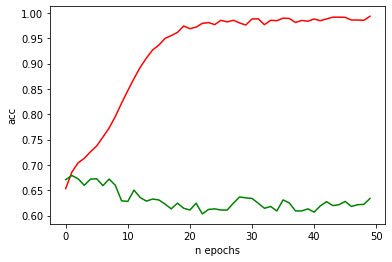

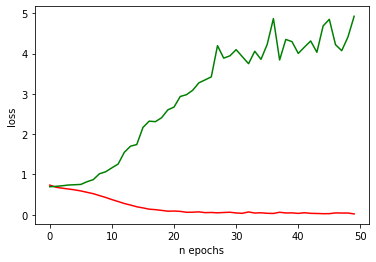

In [ ]:
# pintamos gráficas de pérdidas y precisión
plt.figure(0)
plt.plot(h.history['accuracy'], 'r')
plt.plot(h.history['val_accuracy'], 'g')
plt.xlabel('n epochs')
plt.ylabel('acc')

plt.figure(1)
plt.plot(h.history['loss'], 'r')
plt.plot(h.history['val_loss'], 'g')
plt.xlabel('n epochs')
plt.ylabel('loss')

Introducimos en el modelo una regularizacion Ridge para ver si mejora

In [ ]:
# Creamos un modelo para hacer primero clasificación con y_class
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l1

model1 = Sequential()
model1.add(Dense(64, input_shape=(caract_train.shape[1],), activation='relu', kernel_regularizer=l1(0.003)))
model1.add(Dropout(0.25))
model1.add(Dense(32, activation='relu', kernel_regularizer=l1(0.003)))
model1.add(Dropout(0.25))
model1.add(Dense(3, activation='softmax'))

# sparse_categorical_crossentropy es exactamente igual que categorical_crossentropy,
# solo que admite enteros en vez de onehot a la entrada
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

h1=model1.fit(data_train_norm, y_class_train_onehot,
          validation_data=(data_val_norm, y_class_val_onehot),
          epochs=50,
          batch_size=8)

#loss, acc = model.evaluate(X_test, y_test)
#print(f'Loss={loss}, Acc={acc}')

Train on 6834 samples, validate on 1702 samples
Epoch 1/50
6834/6834 [==============================] - 4s 546us/step - loss: 1.4082 - accuracy: 0.5805 - val_loss: 0.8851 - val_accuracy: 0.6686
Epoch 2/50
6834/6834 [==============================] - 4s 527us/step - loss: 0.8638 - accuracy: 0.6339 - val_loss: 0.8171 - val_accuracy: 0.6586
Epoch 3/50
6834/6834 [==============================] - 3s 510us/step - loss: 0.8374 - accuracy: 0.6327 - val_loss: 0.8089 - val_accuracy: 0.6434
Epoch 4/50
6834/6834 [==============================] - 3s 508us/step - loss: 0.8276 - accuracy: 0.6343 - val_loss: 0.7965 - val_accuracy: 0.6533
Epoch 5/50
6834/6834 [==============================] - 4s 514us/step - loss: 0.8275 - accuracy: 0.6296 - val_loss: 0.7974 - val_accuracy: 0.6598
Epoch 6/50
6834/6834 [==============================] - 3s 512us/step - loss: 0.8208 - accuracy: 0.6428 - val_loss: 0.7991 - val_accuracy: 0.6716
Epoch 7/50
6834/6834 [==============================] - 3s 510us/step - loss

Text(0, 0.5, 'loss')

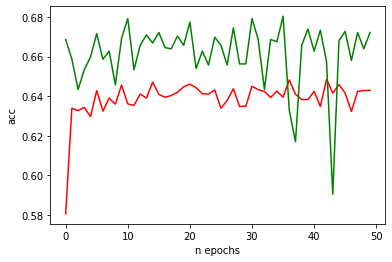

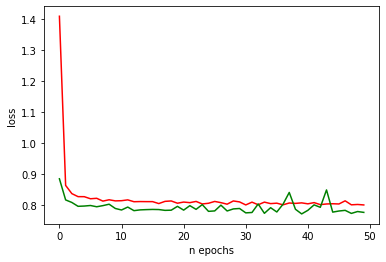

In [ ]:
# pintamos gráficas de pérdidas y precisión
plt.figure(0)
plt.plot(h1.history['accuracy'], 'r')
plt.plot(h1.history['val_accuracy'], 'g')
plt.xlabel('n epochs')
plt.ylabel('acc')

plt.figure(1)
plt.plot(h1.history['loss'], 'r')
plt.plot(h1.history['val_loss'], 'g')
plt.xlabel('n epochs')
plt.ylabel('loss')

In [ ]:
data_test_norm = min_max_scaler.fit_transform(caract_test)

Pbamos metiendo una regulaización Rige y en otra capa una regularización Lasso

In [ ]:

from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l1
from keras.regularizers import l2
model2 = Sequential()
model2.add(Dense(64, input_shape=(caract_train.shape[1],), activation='relu', kernel_regularizer=l1(0.003)))
model2.add(Dropout(0.25))
model2.add(Dense(32, activation='relu', kernel_regularizer=l2(0.003)))
model2.add(Dropout(0.25))
model2.add(Dense(3, activation='softmax'))

# sparse_categorical_crossentropy es exactamente igual que categorical_crossentropy,
# solo que admite enteros en vez de onehot a la entrada
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

h2=model2.fit(data_train_norm, y_class_train_onehot,
          validation_data=(data_val_norm, y_class_val_onehot),
          epochs=50,
          batch_size=8)

#loss, acc = model.evaluate(X_test, y_test)
#print(f'Loss={loss}, Acc={acc}')

Train on 6834 samples, validate on 1702 samples
Epoch 1/50
6834/6834 [==============================] - 4s 537us/step - loss: 1.2458 - accuracy: 0.5860 - val_loss: 0.8865 - val_accuracy: 0.6387
Epoch 2/50
6834/6834 [==============================] - 3s 491us/step - loss: 0.8732 - accuracy: 0.6280 - val_loss: 0.8516 - val_accuracy: 0.6416
Epoch 3/50
6834/6834 [==============================] - 3s 510us/step - loss: 0.8485 - accuracy: 0.6446 - val_loss: 0.8385 - val_accuracy: 0.6486
Epoch 4/50
6834/6834 [==============================] - 3s 509us/step - loss: 0.8365 - accuracy: 0.6460 - val_loss: 0.8523 - val_accuracy: 0.6140
Epoch 5/50
6834/6834 [==============================] - 3s 508us/step - loss: 0.8326 - accuracy: 0.6443 - val_loss: 0.8027 - val_accuracy: 0.6686
Epoch 6/50
6834/6834 [==============================] - 3s 492us/step - loss: 0.8247 - accuracy: 0.6504 - val_loss: 0.8257 - val_accuracy: 0.6345
Epoch 7/50
6834/6834 [==============================] - 3s 497us/step - loss

Text(0, 0.5, 'loss')

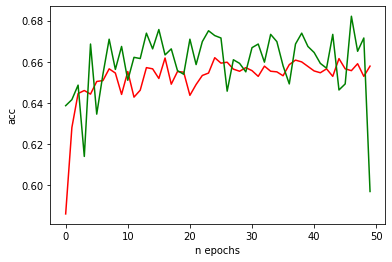

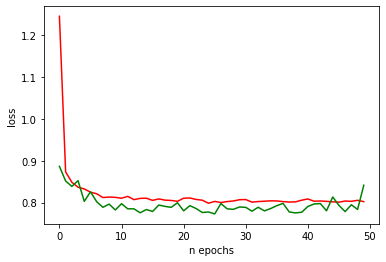

In [ ]:
# pintamos gráficas de pérdidas y precisión
plt.figure(0)
plt.plot(h2.history['accuracy'], 'r')
plt.plot(h2.history['val_accuracy'], 'g')
plt.xlabel('n epochs')
plt.ylabel('acc')

plt.figure(1)
plt.plot(h2.history['loss'], 'r')
plt.plot(h2.history['val_loss'], 'g')
plt.xlabel('n epochs')
plt.ylabel('loss')

In [ ]:
loss, acc = model1.evaluate(data_test_norm, y_class_test_onehot)
print(f'Loss={loss}, Acc={acc}')

2172/2172 [==============================] - 0s 64us/step
Loss=0.7924834088067323, Acc=0.6754143834114075


In [ ]:
# Vamos a juntar las features de las imagenes y el dataset numérico/categórico
data_full_train = np.concatenate((dfTrain_with_imgs.values, caract_train), axis=1)
print(data_full_train.shape)

(6834, 540)


In [ ]:
# Vamos a juntar las features de las imagenes y el dataset numérico/categórico
data_full_val = np.concatenate((dfVal_with_imgs.values, caract_val), axis=1)
print(data_full_val.shape)

(1702, 540)


In [ ]:
# Vamos a juntar las features de las imagenes y el dataset numérico/categórico
data_full_test = np.concatenate((dfTest_with_imgs.values, caract_test), axis=1)
print(data_full_test.shape)

(2172, 540)


In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data_full_train_norm = min_max_scaler.fit_transform(data_full_train)
data_full_val_norm = min_max_scaler.fit_transform(data_full_val)
data_full_test_norm = min_max_scaler.fit_transform(data_full_test)

In [ ]:
# Creamos un modelo para hacer primero clasificación con y_class
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam

modelmix = Sequential()
modelmix.add(Dense(128, input_shape=(data_full_train_norm.shape[1],), activation='relu'))
modelmix.add(Dropout(0.2))
modelmix.add(Dense(64, activation='relu'))
modelmix.add(Dropout(0.2))
modelmix.add(Dense(32, activation='relu'))
modelmix.add(Dropout(0.2))
modelmix.add(Dense(3, activation='softmax'))  # tenemos 3 clases

# sparse_categorical_crossentropy es exactamente igual que categorical_crossentropy,
# solo que admite enteros en vez de onehot a la entrada
opt = Adam(learning_rate=0.0001)
modelmix.compile(loss='categorical_crossentropy', optimizer=opt, 
              metrics=['accuracy'])

hmix=modelmix.fit(data_full_train_norm, y_class_train_onehot,
          validation_data=(data_full_val_norm, y_class_val_onehot),
          epochs=50,
          batch_size=8)

Train on 6834 samples, validate on 1702 samples
Epoch 1/50
6834/6834 [==============================] - 4s 576us/step - loss: 0.7806 - accuracy: 0.6462 - val_loss: 0.5763 - val_accuracy: 0.7779
Epoch 2/50
6834/6834 [==============================] - 4s 545us/step - loss: 0.6000 - accuracy: 0.7755 - val_loss: 0.5176 - val_accuracy: 0.7949
Epoch 3/50
6834/6834 [==============================] - 4s 552us/step - loss: 0.5396 - accuracy: 0.7975 - val_loss: 0.5111 - val_accuracy: 0.7838
Epoch 4/50
6834/6834 [==============================] - 4s 560us/step - loss: 0.5049 - accuracy: 0.8088 - val_loss: 0.4819 - val_accuracy: 0.7920
Epoch 5/50
6834/6834 [==============================] - 4s 553us/step - loss: 0.4725 - accuracy: 0.8172 - val_loss: 0.4392 - val_accuracy: 0.8067
Epoch 6/50
6834/6834 [==============================] - 4s 543us/step - loss: 0.4445 - accuracy: 0.8202 - val_loss: 0.4310 - val_accuracy: 0.8126
Epoch 7/50
6834/6834 [==============================] - 4s 551us/step - loss

Text(0, 0.5, 'loss')

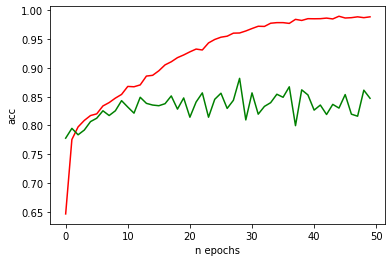

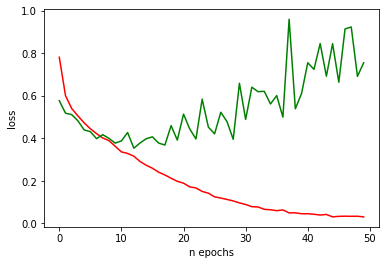

In [ ]:
# pintamos gráficas de pérdidas y precisión
plt.figure(0)
plt.plot(hmix.history['accuracy'], 'r')
plt.plot(hmix.history['val_accuracy'], 'g')
plt.xlabel('n epochs')
plt.ylabel('acc')

plt.figure(1)
plt.plot(hmix.history['loss'], 'r')
plt.plot(hmix.history['val_loss'], 'g')
plt.xlabel('n epochs')
plt.ylabel('loss')

Se observa que hay que ajustar el modelo inicial, probamos a introducir regularización

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.regularizers import l1
from keras.regularizers import l2

modelmix1 = Sequential()
modelmix1.add(Dense(128, input_shape=(data_full_train_norm.shape[1],), activation='relu', kernel_regularizer=l1(0.003)))
modelmix1.add(Dropout(0.2))
modelmix1.add(Dense(64, activation='relu', kernel_regularizer=l1(0.003)))
modelmix1.add(Dropout(0.2))
modelmix1.add(Dense(32, activation='relu', kernel_regularizer=l1(0.003)))
modelmix1.add(Dropout(0.2))
modelmix1.add(Dense(3, activation='softmax'))  # tenemos 3 clases

# sparse_categorical_crossentropy es exactamente igual que categorical_crossentropy,
# solo que admite enteros en vez de onehot a la entrada
opt = Adam(learning_rate=0.0001)
modelmix1.compile(loss='categorical_crossentropy', optimizer=opt, 
              metrics=['accuracy'])

hmix1=modelmix1.fit(data_full_train_norm, y_class_train_onehot,
          validation_data=(data_full_val_norm, y_class_val_onehot),
          epochs=50,
          batch_size=8)

Train on 6834 samples, validate on 1702 samples
Epoch 1/50
6834/6834 [==============================] - 4s 617us/step - loss: 7.2242 - accuracy: 0.5831 - val_loss: 2.8470 - val_accuracy: 0.7756
Epoch 2/50
6834/6834 [==============================] - 4s 572us/step - loss: 1.9325 - accuracy: 0.7527 - val_loss: 1.3960 - val_accuracy: 0.7955
Epoch 3/50
6834/6834 [==============================] - 4s 563us/step - loss: 1.2603 - accuracy: 0.7867 - val_loss: 1.0858 - val_accuracy: 0.7955
Epoch 4/50
6834/6834 [==============================] - 4s 563us/step - loss: 1.0547 - accuracy: 0.7931 - val_loss: 0.9512 - val_accuracy: 0.7955
Epoch 5/50
6834/6834 [==============================] - 4s 571us/step - loss: 0.9495 - accuracy: 0.7938 - val_loss: 0.8808 - val_accuracy: 0.7955
Epoch 6/50
6834/6834 [==============================] - 4s 573us/step - loss: 0.8856 - accuracy: 0.7947 - val_loss: 0.8214 - val_accuracy: 0.7955
Epoch 7/50
6834/6834 [==============================] - 4s 575us/step - loss

Text(0, 0.5, 'loss')

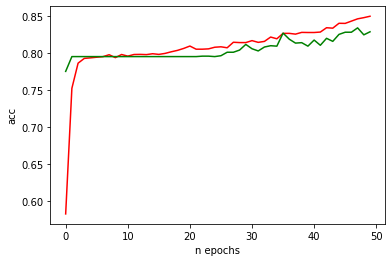

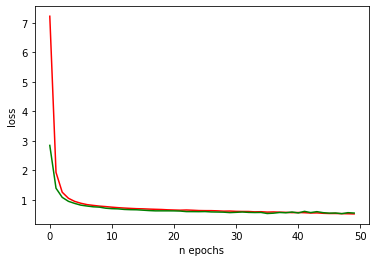

In [ ]:
# pintamos gráficas de pérdidas y precisión
plt.figure(0)
plt.plot(hmix1.history['accuracy'], 'r')
plt.plot(hmix1.history['val_accuracy'], 'g')
plt.xlabel('n epochs')
plt.ylabel('acc')

plt.figure(1)
plt.plot(hmix1.history['loss'], 'r')
plt.plot(hmix1.history['val_loss'], 'g')
plt.xlabel('n epochs')
plt.ylabel('loss')

Tras varias configuraciones, introduciendo en el modelo regularizaciones L1, L2, cambiando en learning_rate y ya finalmente acotando los pesos he llegado ese modelo

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.regularizers import l1
from keras.regularizers import l2
from keras.regularizers import l1_l2
from keras.constraints import max_norm

modelmix2 = Sequential()
modelmix2.add(Dense(128, input_shape=(data_full_train_norm.shape[1],), activation='relu', kernel_regularizer=l2(0.003), kernel_constraint=max_norm(3.)))
modelmix2.add(Dropout(0.3))
modelmix2.add(Dense(64, activation='relu', kernel_regularizer=l2(0.003)))
modelmix2.add(Dropout(0.3))
#modelmix2.add(Dense(32, activation='relu'))
#modelmix2.add(Dropout(0.3))

modelmix2.add(Dense(3, activation='softmax'))  # tenemos 3 clases

# sparse_categorical_crossentropy es exactamente igual que categorical_crossentropy,
# solo que admite enteros en vez de onehot a la entrada
opt = Adam(learning_rate=0.00001)
modelmix2.compile(loss='categorical_crossentropy', optimizer=opt, 
              metrics=['accuracy'])

hmix2=modelmix2.fit(data_full_train_norm, y_class_train_onehot,
          validation_data=(data_full_val_norm, y_class_val_onehot),
          epochs=50,
          batch_size=8)

Train on 6834 samples, validate on 1702 samples
Epoch 1/50
6834/6834 [==============================] - 4s 581us/step - loss: 1.8432 - accuracy: 0.4716 - val_loss: 1.6943 - val_accuracy: 0.5776
Epoch 2/50
6834/6834 [==============================] - 4s 530us/step - loss: 1.6719 - accuracy: 0.5356 - val_loss: 1.5721 - val_accuracy: 0.6193
Epoch 3/50
6834/6834 [==============================] - 4s 527us/step - loss: 1.5767 - accuracy: 0.5866 - val_loss: 1.4922 - val_accuracy: 0.6434
Epoch 4/50
6834/6834 [==============================] - 4s 517us/step - loss: 1.5010 - accuracy: 0.6175 - val_loss: 1.4214 - val_accuracy: 0.6827
Epoch 5/50
6834/6834 [==============================] - 3s 506us/step - loss: 1.4322 - accuracy: 0.6658 - val_loss: 1.3571 - val_accuracy: 0.7150
Epoch 6/50
6834/6834 [==============================] - 4s 526us/step - loss: 1.3709 - accuracy: 0.6927 - val_loss: 1.2999 - val_accuracy: 0.7385
Epoch 7/50
6834/6834 [==============================] - 4s 532us/step - loss

Text(0, 0.5, 'loss')

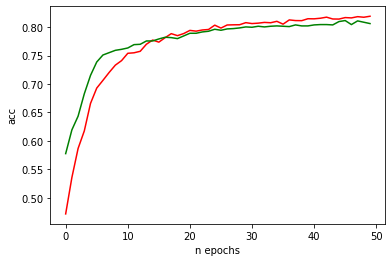

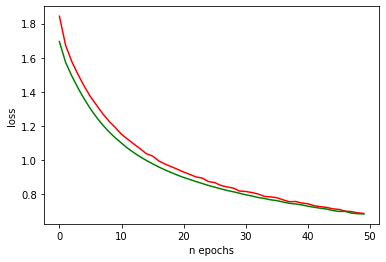

In [ ]:
# pintamos gráficas de pérdidas y precisión
plt.figure(0)
plt.plot(hmix2.history['accuracy'], 'r')
plt.plot(hmix2.history['val_accuracy'], 'g')
plt.xlabel('n epochs')
plt.ylabel('acc')

plt.figure(1)
plt.plot(hmix2.history['loss'], 'r')
plt.plot(hmix2.history['val_loss'], 'g')
plt.xlabel('n epochs')
plt.ylabel('loss')

In [ ]:
loss, acc = modelmix2.evaluate(data_full_test_norm, y_class_test_onehot)
print(f'Loss={loss}, Acc={acc}')

2172/2172 [==============================] - 0s 72us/step
Loss=0.675454184495283, Acc=0.8158379197120667


LLegamos en test a 81% que es del mismo orden que el que tenemos en train y validación

**Regresión**

In [ ]:
maxPrice = y_train_reg.max()
print(f'Max precio={maxPrice}')
trainY_nom = y_train_reg / maxPrice
valY_nom = y_val_reg/ maxPrice
testY_norm = y_test_reg/ maxPrice

Max precio=850.0


In [ ]:
data_full_val_norm.shape[1]

540

In [ ]:
valY_nom.shape

(1702,)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
modelr = Sequential()
modelr.add(Dense(64, input_shape=(data_full_train_norm.shape[1],), activation='relu'))
modelr.add(Dropout(0.2))
modelr.add(Dense(32, activation='relu'))
modelr.add(Dropout(0.2))
modelr.add(Dense(32, activation='relu'))
modelr.add(Dropout(0.2))
modelr.add(Dense(1, activation='linear'))  # sin funcion de act y solo 1 neurona

# sparse_categorical_crossentropy es exactamente igual que categorical_crossentropy,
# solo que admite enteros en vez de onehot a la entrada
opt = Adam(learning_rate=0.0001)
modelr.compile(loss='mean_squared_error', optimizer=opt)

hr=modelr.fit(data_full_train_norm, trainY_nom,
          validation_data=(data_full_val_norm, valY_nom), epochs=100)

Train on 6834 samples, validate on 1702 samples
Epoch 1/100
6834/6834 [==============================] - 1s 209us/step - loss: 0.0069 - val_loss: 0.0031
Epoch 2/100
6834/6834 [==============================] - 1s 134us/step - loss: 0.0046 - val_loss: 0.0028
Epoch 3/100
6834/6834 [==============================] - 1s 132us/step - loss: 0.0040 - val_loss: 0.0027
Epoch 4/100
6834/6834 [==============================] - 1s 132us/step - loss: 0.0037 - val_loss: 0.0024
Epoch 5/100
6834/6834 [==============================] - 1s 135us/step - loss: 0.0035 - val_loss: 0.0023
Epoch 6/100
6834/6834 [==============================] - 1s 133us/step - loss: 0.0032 - val_loss: 0.0021
Epoch 7/100
6834/6834 [==============================] - 1s 129us/step - loss: 0.0031 - val_loss: 0.0020
Epoch 8/100
6834/6834 [==============================] - 1s 130us/step - loss: 0.0029 - val_loss: 0.0018
Epoch 9/100
6834/6834 [==============================] - 1s 133us/step - loss: 0.0027 - val_loss: 0.0017
Epoch 1

Text(0, 0.5, 'loss')

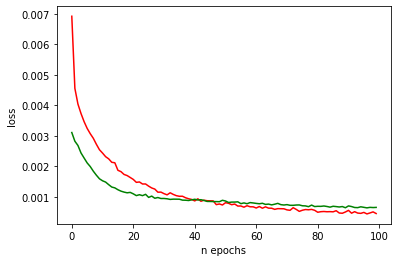

In [ ]:
plt.figure(0)
plt.plot(hr.history['loss'], 'r')
plt.plot(hr.history['val_loss'], 'g')
plt.xlabel('n epochs')
plt.ylabel('loss')

In [ ]:
loss = modelr.evaluate(data_full_test_norm, testY_norm)
print(f'Loss={loss}')

2172/2172 [==============================] - 0s 58us/step
Loss=0.000890565831199182


Error medio absoluto: 15.452216904466324


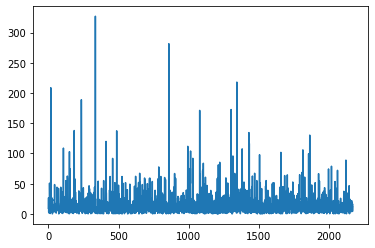

In [ ]:
y_pred = modelr.predict(data_full_test_norm)
y_pred_denorm = y_pred[:, 0] * maxPrice
y_test_denorm = testY_norm * maxPrice
error_denorm = np.abs(y_pred_denorm - y_test_denorm)
plt.plot(range(y_pred.shape[0]), error_denorm)
print(f'Error medio absoluto: {error_denorm.mean()}')

In [ ]:
for y, pred, error in zip(y_test_denorm, y_pred_denorm, error_denorm):
  print(f'Valor: {y:.2f} Predición: {pred:.2f}. Error: {error:.2f}')

Valor: 25.00 Predición: 34.39. Error: 9.39
Valor: 65.00 Predición: 38.30. Error: 26.70
Valor: 23.00 Predición: 25.82. Error: 2.82
Valor: 68.00 Predición: 94.56. Error: 26.56
Valor: 28.00 Predición: 31.85. Error: 3.85
Valor: 65.00 Predición: 66.38. Error: 1.38
Valor: 60.00 Predición: 76.44. Error: 16.44
Valor: 30.00 Predición: 32.94. Error: 2.94
Valor: 210.00 Predición: 159.13. Error: 50.87
Valor: 40.00 Predición: 56.44. Error: 16.44
Valor: 36.00 Predición: 28.65. Error: 7.35
Valor: 43.00 Predición: 48.86. Error: 5.86
Valor: 89.00 Predición: 68.09. Error: 20.91
Valor: 32.00 Predición: 31.34. Error: 0.66
Valor: 110.00 Predición: 87.19. Error: 22.81
Valor: 75.00 Predición: 58.04. Error: 16.96
Valor: 20.00 Predición: 33.84. Error: 13.84
Valor: 300.00 Predición: 91.30. Error: 208.70
Valor: 25.00 Predición: 37.50. Error: 12.50
Valor: 25.00 Predición: 29.57. Error: 4.57
Valor: 39.00 Predición: 54.26. Error: 15.26
Valor: 45.00 Predición: 42.00. Error: 3.00
Valor: 36.00 Predición: 51.42. Error:

In [ ]:
print(f'Error absoluto: {np.mean(error_denorm)}')
print(f'Error cuadrático medio: {np.mean(error_denorm**2)}')

Error absoluto: 15.452216904466324
Error cuadrático medio: 643.4337719608313
